##### Import module 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
files = [file for file in os.listdir('C:/Users/Papa-SEYE/Downloads/tuto/SalesAnalysis/Sales_Data')]
print(files)

['Sales_April_2019.csv', 'Sales_August_2019.csv', 'Sales_December_2019.csv', 'Sales_February_2019.csv', 'Sales_January_2019.csv', 'Sales_July_2019.csv', 'Sales_June_2019.csv', 'Sales_March_2019.csv', 'Sales_May_2019.csv', 'Sales_November_2019.csv', 'Sales_October_2019.csv', 'Sales_September_2019.csv']


In [3]:
all_data = pd.DataFrame()
for file in files:
    df = pd.read_csv('C:/Users/Papa-SEYE/Downloads/tuto/SalesAnalysis/Sales_Data/'+file)
    all_data = pd.concat([all_data,df])

In [4]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### Question 1: Le mois le plus rentable de l'année 2019

In [5]:
all_data['Month'] = all_data['Order Date'].str[0:2]

In [6]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04


## Récupération des lignes qui contiennent des NaN

In [7]:
nan_df_1 = all_data[all_data.isna().any(axis=1)]

In [8]:
nan_df_1.shape

(545, 7)

### Conversion des colonnes  'Price Each', 'Quantity Order' et 'Month' en réel

In [9]:
all_data['Month'] = pd.to_numeric(all_data['Month'], errors='coerce')
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'], errors='coerce')
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'], errors='coerce')

### Suppresssion des valeurs manquantes

In [10]:
all_data.dropna(axis=0, inplace=True)

In [11]:
all_data['Sales'] = all_data['Price Each']*all_data['Quantity Ordered']

In [12]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4.0,23.90
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4.0,99.99
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4.0,600.00
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4.0,11.99
5,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4.0,11.99


#### Conversion de la colonne 'Month' en int

In [13]:
all_data['Month'] = all_data['Month'].astype('int')

In [14]:
results = all_data.groupby('Month').sum()

In [15]:
results

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903.0,1.811768e+06,1.822257e+06
2,13449.0,2.188885e+06,2.202022e+06
3,17005.0,2.791208e+06,2.807100e+06
4,20558.0,3.367671e+06,3.390670e+06
5,18667.0,3.135125e+06,3.152607e+06
6,15253.0,2.562026e+06,2.577802e+06
7,16072.0,2.632540e+06,2.647776e+06
8,13448.0,2.230345e+06,2.244468e+06
9,13109.0,2.084992e+06,2.097560e+06


In [16]:
month_int = [m for m, df in all_data.groupby('Month')]

In [17]:
month_int

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [18]:
import calendar

In [19]:
month_name = [calendar.month_name[m] for m in month_int]

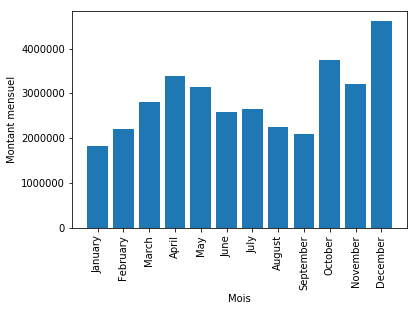

In [20]:
plt.bar(month_name, results['Sales'])
plt.xticks(month_name, rotation=90)
plt.xlabel('Mois')
plt.ylabel('Montant mensuel')
plt.show()

#### Le meilleur mois de vente

Le mois de décembre est le meilleur mois de vente. Cela est du fait que c'est le mois ou les gens achètent plus de cadeau pour leurs amis, parents, enfants, etc.

###  Question 2: quelle est la ville qui a obtenu la meilleure vente de l'année 2019

In [21]:
def get_city(address):
    return address.split(',')[1]
def get_state(address):
    return address.split(',')[2].split(' ')[1]

In [22]:
all_data['City'] = all_data['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})")

In [23]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


In [24]:
group_city = all_data.groupby('City').sum()

In [25]:
group_city.head()

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta (GA),16602.0,2.779908e+06,104794,2.795499e+06
Austin (TX),11153.0,1.809874e+06,69829,1.819582e+06
Boston (MA),22528.0,3.637410e+06,141112,3.661642e+06
Dallas (TX),16730.0,2.752628e+06,104620,2.767975e+06
Los Angeles (CA),33289.0,5.421435e+06,208325,5.452571e+06


In [26]:
city_names = group_city.index

In [27]:
city_names = city_names.tolist()

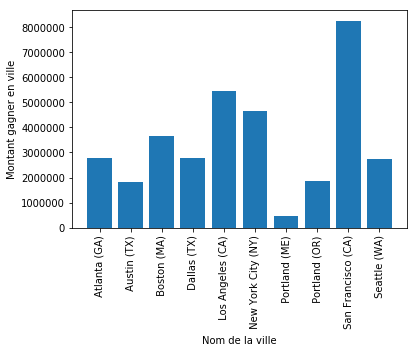

In [28]:
plt.bar(city_names, group_city['Sales'])
plt.xticks(city_names, rotation=90)
plt.xlabel('Nom de la ville')
plt.ylabel('Montant gagner en ville')
plt.show()

## Question 3: Quelle est l'heure où il y a plus de vente (Heure de pointe)

In [29]:
all_data["Order Date"] = pd.to_datetime(all_data['Order Date'])

In [30]:
all_data['Hour'] = all_data['Order Date'].dt.hour

In [31]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8
2,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22
3,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14
4,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14
5,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9


In [32]:
all_data['Minute'] = all_data['Order Date'].dt.minute

In [33]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
3,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27


In [34]:
group_hour = all_data.groupby('Hour').count()

In [35]:
heure = group_hour.index.tolist()

C:\Users\Papa-SEYE\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\Papa-SEYE\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


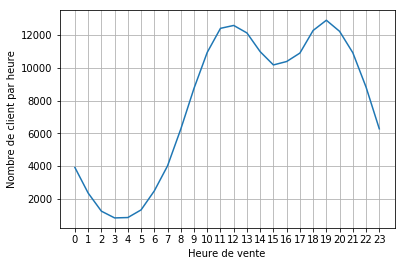

In [36]:
plt.plot(heure, group_hour['Order ID'])
plt.grid()
plt.xticks(heure)
plt.xlabel('Heure de vente')
plt.ylabel('Nombre de client par heure')
plt.show()

### Quels sont les plroduits qui sont achètés ensemble.

In [58]:
all_data.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
3,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27
6,176562,USB-C Charging Cable,1.0,11.95,2019-04-29 13:03:00,"381 Wilson St, San Francisco, CA 94016",4,11.95,San Francisco (CA),13,3
7,176563,Bose SoundSport Headphones,1.0,99.99,2019-04-02 07:46:00,"668 Center St, Seattle, WA 98101",4,99.99,Seattle (WA),7,46
8,176564,USB-C Charging Cable,1.0,11.95,2019-04-12 10:58:00,"790 Ridge St, Atlanta, GA 30301",4,11.95,Atlanta (GA),10,58
9,176565,Macbook Pro Laptop,1.0,1700.00,2019-04-24 10:38:00,"915 Willow St, San Francisco, CA 94016",4,1700.00,San Francisco (CA),10,38
10,176566,Wired Headphones,1.0,11.99,2019-04-08 14:05:00,"83 7th St, Boston, MA 02215",4,11.99,Boston (MA),14,5


In [61]:
df = all_data[all_data.duplicated(keep=False)]

In [62]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
30,176585,Bose SoundSport Headphones,1.0,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston (MA),11,31
31,176585,Bose SoundSport Headphones,1.0,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston (MA),11,31
1301,177795,Apple Airpods Headphones,1.0,150.00,2019-04-27 19:45:00,"740 14th St, Seattle, WA 98101",4,150.00,Seattle (WA),19,45
1302,177795,Apple Airpods Headphones,1.0,150.00,2019-04-27 19:45:00,"740 14th St, Seattle, WA 98101",4,150.00,Seattle (WA),19,45
1682,178158,USB-C Charging Cable,1.0,11.95,2019-04-28 21:13:00,"197 Center St, San Francisco, CA 94016",4,11.95,San Francisco (CA),21,13


In [66]:
df['Grouped']= df.groupby('Order ID')['Product'].transform(lambda x: ', '.join(x))

C:\Users\Papa-SEYE\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [67]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute,Grouped
30,176585,Bose SoundSport Headphones,1.0,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston (MA),11,31,"Bose SoundSport Headphones, Bose SoundSport He..."
31,176585,Bose SoundSport Headphones,1.0,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston (MA),11,31,"Bose SoundSport Headphones, Bose SoundSport He..."
1301,177795,Apple Airpods Headphones,1.0,150.00,2019-04-27 19:45:00,"740 14th St, Seattle, WA 98101",4,150.00,Seattle (WA),19,45,"Apple Airpods Headphones, Apple Airpods Headph..."
1302,177795,Apple Airpods Headphones,1.0,150.00,2019-04-27 19:45:00,"740 14th St, Seattle, WA 98101",4,150.00,Seattle (WA),19,45,"Apple Airpods Headphones, Apple Airpods Headph..."
1682,178158,USB-C Charging Cable,1.0,11.95,2019-04-28 21:13:00,"197 Center St, San Francisco, CA 94016",4,11.95,San Francisco (CA),21,13,"USB-C Charging Cable, USB-C Charging Cable"


In [68]:
df_group = df[['Order ID', 'Grouped']].drop_duplicates()

In [69]:
df_group.head()

,Order ID,Grouped
30,176585,"Bose SoundSport Headphones, Bose SoundSport He..."
1301,177795,"Apple Airpods Headphones, Apple Airpods Headph..."
1682,178158,"USB-C Charging Cable, USB-C Charging Cable"
3804,180207,"Apple Airpods Headphones, Apple Airpods Headph..."
4195,180576,"Lightning Charging Cable, Lightning Charging C..."


In [70]:
from collections import Counter
from itertools import combinations

In [81]:
count = Counter()
for row in df['Grouped']:
    row_list = row.split(',')
    count.update((combinations(row_list, 2)))

In [82]:
count.most_common(10)

[(('Lightning Charging Cable', ' Lightning Charging Cable'), 96),
 (('USB-C Charging Cable', ' USB-C Charging Cable'), 88),
 (('Wired Headphones', ' Wired Headphones'), 66),
 (('AAA Batteries (4-pack)', ' AAA Batteries (4-pack)'), 58),
 (('Bose SoundSport Headphones', ' Bose SoundSport Headphones'), 54),
 (('Apple Airpods Headphones', ' Apple Airpods Headphones'), 48),
 (('AA Batteries (4-pack)', ' AA Batteries (4-pack)'), 38),
 (('27in FHD Monitor', ' 27in FHD Monitor'), 18),
 (('34in Ultrawide Monitor', ' 34in Ultrawide Monitor'), 14),
 (('Flatscreen TV', ' Flatscreen TV'), 12)]

In [80]:
for key, val in count.most_common(10):
    print(f"{key} : {val}")

In [83]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute,Grouped
30,176585,Bose SoundSport Headphones,1.0,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston (MA),11,31,"Bose SoundSport Headphones, Bose SoundSport He..."
31,176585,Bose SoundSport Headphones,1.0,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston (MA),11,31,"Bose SoundSport Headphones, Bose SoundSport He..."
1301,177795,Apple Airpods Headphones,1.0,150.00,2019-04-27 19:45:00,"740 14th St, Seattle, WA 98101",4,150.00,Seattle (WA),19,45,"Apple Airpods Headphones, Apple Airpods Headph..."
1302,177795,Apple Airpods Headphones,1.0,150.00,2019-04-27 19:45:00,"740 14th St, Seattle, WA 98101",4,150.00,Seattle (WA),19,45,"Apple Airpods Headphones, Apple Airpods Headph..."
1682,178158,USB-C Charging Cable,1.0,11.95,2019-04-28 21:13:00,"197 Center St, San Francisco, CA 94016",4,11.95,San Francisco (CA),21,13,"USB-C Charging Cable, USB-C Charging Cable"


### Question 5: Quelle est la quantité de produit la mieux vendues et pourquoi ?

In [90]:
prod = all_data.groupby('Product')

In [91]:
produits = [produit for produit, df in prod]

In [92]:
prices = prod['Price Each'].mean()

In [93]:
prices

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

In [100]:
prod['Quantity Ordered'].head()

0       2.0
2       1.0
3       1.0
4       1.0
5       1.0
       ... 
598     1.0
613     1.0
867     1.0
1422    1.0
1630    1.0
Name: Quantity Ordered, Length: 95, dtype: float64

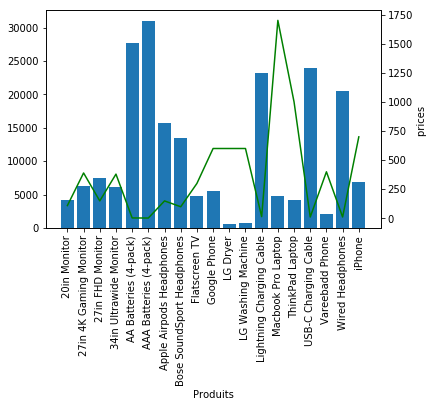

In [126]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(produits, prod.sum()['Quantity Ordered'],)
ax2.plot(produits, prices, 'g')
ax1.set_xlabel("Produits")
ax2.set_ylabel("prices ")
ax1.set_xticklabels(produits, rotation=90)
plt.show()
